In [1]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import folium as fm
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

path1 = r'C:\Users\pltzi\Desktop\data mining\data\april'
path2 = r'C:\Users\pltzi\Desktop\data mining\data\febrouary'
path3 = r'C:\Users\pltzi\Desktop\data mining\data\march'
df1=pd.read_csv(path1+"\\"+"listings.csv",usecols=[
'id',
'zipcode',
'transit',
'bedrooms',
'beds',
'review_scores_rating',
'number_of_reviews',
'neighbourhood',
'name',
'latitude',
'longitude',
'last_review',
'instant_bookable',
'host_since',
'host_response_rate',
'host_identity_verified',
'host_has_profile_pic',
'first_review',
'description',
'city',
'cancellation_policy',
'bed_type',
'bathrooms',
'accommodates',
'amenities',
'room_type',
'property_type',
'price',
'availability_365',
'minimum_nights'
])
df2=pd.read_csv(path2+"\\"+"listings.csv",usecols=[
'id',
'zipcode',
'transit',
'bedrooms',
'beds',
'review_scores_rating',
'number_of_reviews',
'neighbourhood',
'name',
'latitude',
'longitude',
'last_review',
'instant_bookable',
'host_since',
'host_response_rate',
'host_identity_verified',
'host_has_profile_pic',
'first_review',
'description',
'city',
'cancellation_policy',
'bed_type',
'bathrooms',
'accommodates',
'amenities',
'room_type',
'property_type',
'price',
'availability_365',
'minimum_nights'
])
df3=pd.read_csv(path3+"\\"+"listings.csv",usecols=[
'id',
'zipcode',
'transit',
'bedrooms',
'beds',
'review_scores_rating',
'number_of_reviews',
'neighbourhood',
'name',
'latitude',
'longitude',
'last_review',
'instant_bookable',
'host_since',
'host_response_rate',
'host_identity_verified',
'host_has_profile_pic',
'first_review',
'description',
'city',
'cancellation_policy',
'bed_type',
'bathrooms',
'accommodates',
'amenities',
'room_type',
'property_type',
'price',
'availability_365',
'minimum_nights'
])
df1['month'] = 'April'
df1['month'].fillna('April', inplace = True)

df2['month'] = 'February'
df2['month'].fillna('February', inplace = True)

df3['month'] = 'March'
df3['month'].fillna('March', inplace = True)

df = df1.append(df2)
df = df.append(df3)
df.drop_duplicates(inplace=True)
df.to_csv('train.csv', index=False, header=True)
df=df.dropna(axis=0, how="any")

In [2]:
#Question 1.1

In [3]:
rtypes = df['room_type'].value_counts().index[0]
most_rtype=df['room_type'].value_counts().max()
print(rtypes+": %d" % most_rtype)

Entire home/apt: 13089


In [4]:
#Question 1.2

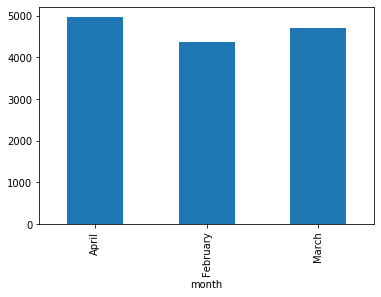

In [5]:
df.groupby('month')['price'].count().plot.bar();

In [6]:
#Question 1.3

In [7]:
df.sort_values('number_of_reviews',inplace = True,ascending=False)
n_list=df['neighbourhood'].value_counts()[:5].index.tolist()
review_num=df['number_of_reviews'].value_counts()[:5].tolist()
for i in range(0,5):
    print(n_list[i],": %d"%review_num[i])

Plaka : 972
Koukaki : 745
Neos Kosmos : 613
Kolonaki : 476
Pangrati : 384


In [8]:
#Question 1.4

In [9]:
new_df=df.copy()
new_df.drop_duplicates(inplace=True,subset="id")
hood = new_df['neighbourhood'].value_counts().index[0]
num_hood=new_df['neighbourhood'].value_counts().max()
print(hood+": %d" % num_hood)

Plaka: 663


In [10]:
#Question 1.5

In [11]:
perhood= new_df['neighbourhood'].value_counts()
print("Registrations per neighbourhood\n")
print(perhood)
permonth=new_df['month'].value_counts()
print("\n\nRegistrations per month\n")
print(permonth)

Registrations per neighbourhood

Plaka                663
Koukaki              522
Neos Kosmos          480
Kolonaki             329
Pangrati             327
Psyri                308
Ambelokipi           288
Larissis             286
Exarcheia            246
Metaxourgeio         233
Kerameikos           202
Mets                 154
Attiki               145
Petralona            135
Kypseli              118
Neapoli              111
Patisia              109
Agios Nikolaos       103
Pedion Areos          98
Ilisia                95
Thiseio               90
Kolonos               73
Gazi                  47
Votanikos             37
Agios Loukas          22
Akadimia Platonos     21
Sepolia               18
Monastiraki           17
Goudi                 13
Rizoupoli              9
Profitis Daniil        6
Rouf                   2
Name: neighbourhood, dtype: int64


Registrations per month

April       3774
March        885
February     648
Name: month, dtype: int64


In [12]:
#Question 1.6

<BarContainer object of 32 artists>

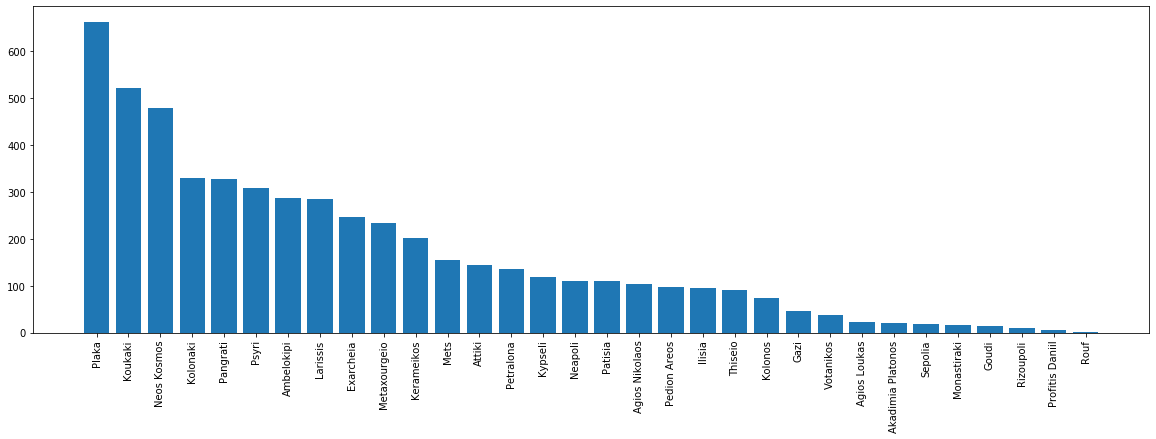

In [13]:
hoods=[]
frequency=[]
for i,j in perhood.items():
  hoods.append(i)
  frequency.append(j)
plt.figure(figsize=(20,6))
y_pos = range(len(hoods))
plt.xticks(y_pos,hoods, rotation=90)
plt.bar(hoods, frequency)

#i hope you didn't just need a plt.hist(perhoods) histogram...

In [14]:
#In case you actually wanted that just uncomment the line below
#plt.hist(perhood)

In [15]:
#Question 1.7

In [16]:
new_df.groupby(['neighbourhood'])['room_type'].agg(pd.Series.mode)

neighbourhood
Agios Loukas         Entire home/apt
Agios Nikolaos       Entire home/apt
Akadimia Platonos    Entire home/apt
Ambelokipi           Entire home/apt
Attiki               Entire home/apt
Exarcheia            Entire home/apt
Gazi                 Entire home/apt
Goudi                Entire home/apt
Ilisia               Entire home/apt
Kerameikos           Entire home/apt
Kolonaki             Entire home/apt
Kolonos              Entire home/apt
Koukaki              Entire home/apt
Kypseli              Entire home/apt
Larissis             Entire home/apt
Metaxourgeio         Entire home/apt
Mets                 Entire home/apt
Monastiraki          Entire home/apt
Neapoli              Entire home/apt
Neos Kosmos          Entire home/apt
Pangrati             Entire home/apt
Patisia              Entire home/apt
Pedion Areos         Entire home/apt
Petralona            Entire home/apt
Plaka                Entire home/apt
Profitis Daniil      Entire home/apt
Psyri                Ent

In [17]:
#Question 1.8

In [18]:
print("The most expensive room type is:\n")
df['price']=df['price'].str.replace('$','') #remove str if you rerun the cell
df['price']=df['price'].str.replace(',','') #remove str if you rerun the cell
df['price']=df['price'].astype(float)
avg = df.groupby('room_type')['price'].mean()
print(avg.index[0]+ ": %f" % avg.max())

The most expensive room type is:

Entire home/apt: 57.560700


In [19]:
#Question 1.9

In [24]:
avg_lat = df1['latitude'].mean()
avg_long = df1['longitude'].mean()
map = fm.Map(location = [avg_lat,avg_long],zoom_start = 11)
for la,lo,pp in zip(df1['latitude'][0:100], df1['longitude'][0:100], df1['room_type']):
    fm.Marker(
        location=[la,lo],
        popup=pp,
        icon=fm.Icon(icon_color='white')
).add_to(map)
display(map)


In [25]:
#Question 1.10

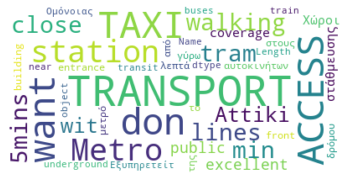

In [22]:
text = df['transit']
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(str(text))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()